In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/KakaoTalk_Photo_2023-08-15-22-07-41 010.jpeg')

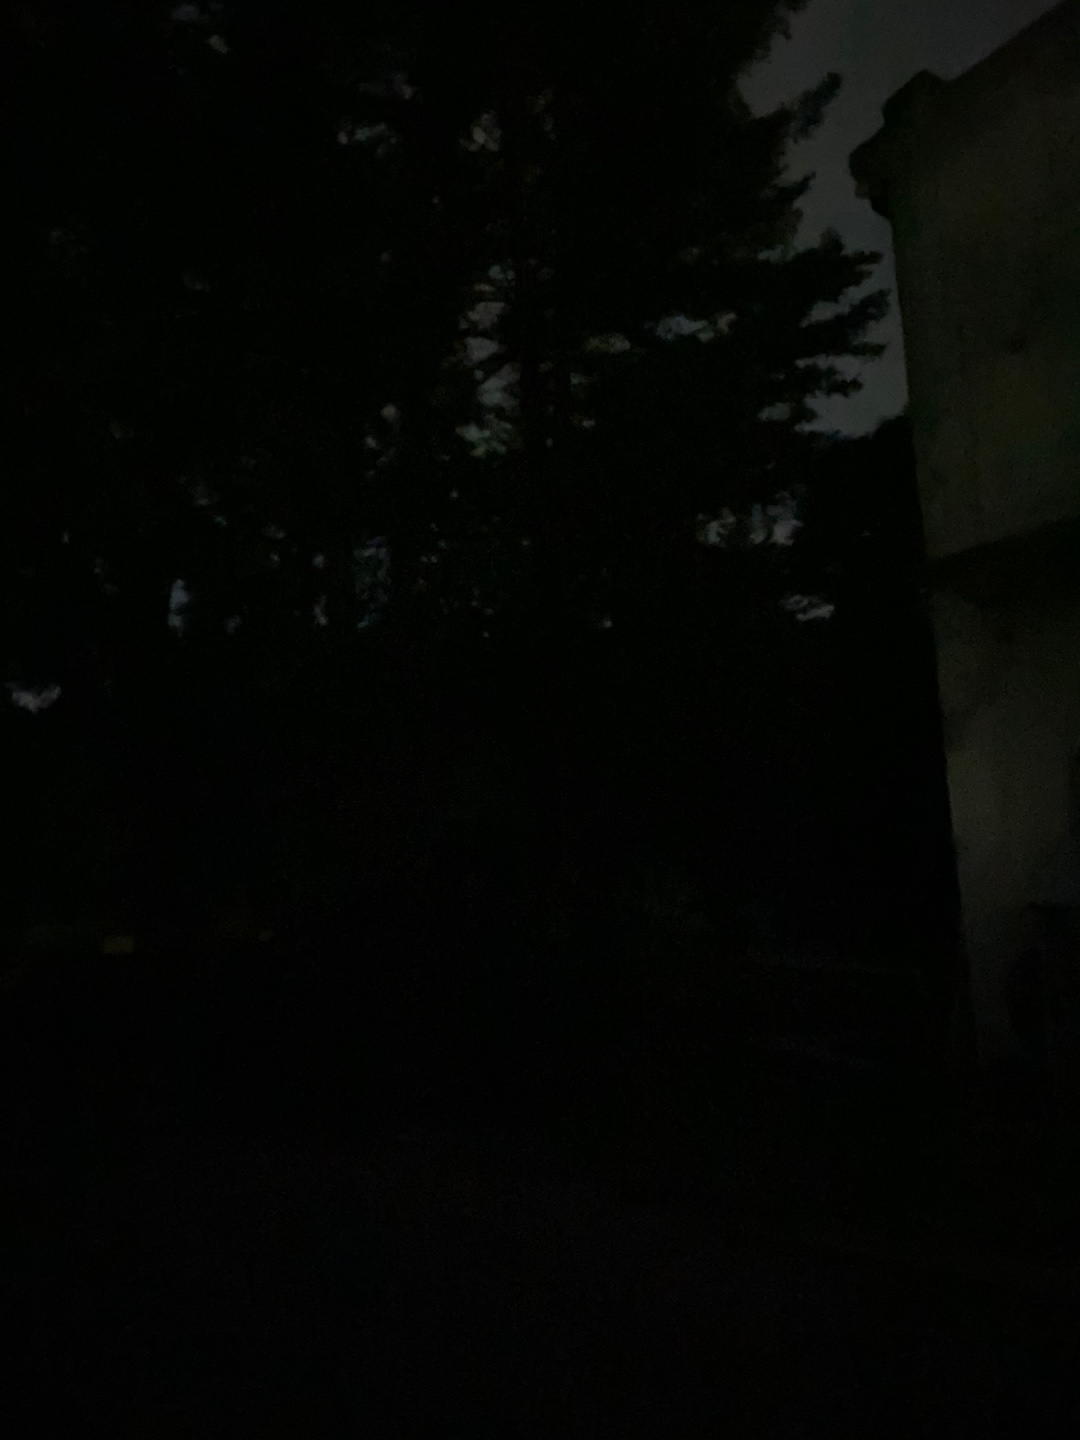

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(1440, 1080, 3)

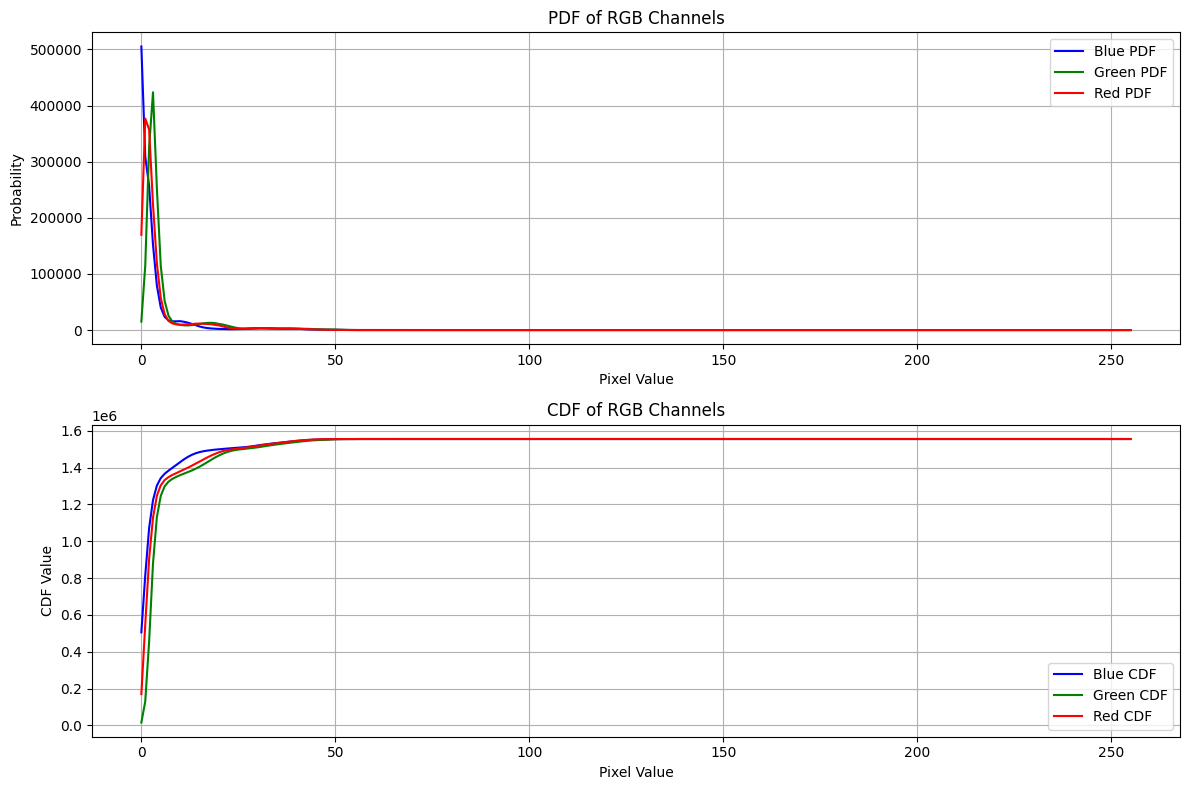

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
image_path = '/content/KakaoTalk_Photo_2023-08-15-22-07-41 010.jpeg'  # 실제 이미지 경로로 대체해주세요
image = cv2.imread(image_path)

# 이미지의 shape 확인
height, width, channels = image.shape

# RGB 채널 분리
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# 히스토그램 계산
hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])

# PDF 계산
pdf_blue = hist_blue
pdf_green = hist_green
pdf_red = hist_red

# CDF 계산
cdf_blue = pdf_blue.cumsum()
cdf_green = pdf_green.cumsum()
cdf_red = pdf_red.cumsum()

# PDF 및 CDF 그래프 그리기
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(pdf_blue, color='blue', label='Blue PDF')
plt.plot(pdf_green, color='green', label='Green PDF')
plt.plot(pdf_red, color='red', label='Red PDF')
plt.title('PDF of RGB Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Probability')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(cdf_blue, color='blue', label='Blue CDF')
plt.plot(cdf_green, color='green', label='Green CDF')
plt.plot(cdf_red, color='red', label='Red CDF')
plt.title('CDF of RGB Channels')
plt.xlabel('Pixel Value')
plt.ylabel('CDF Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


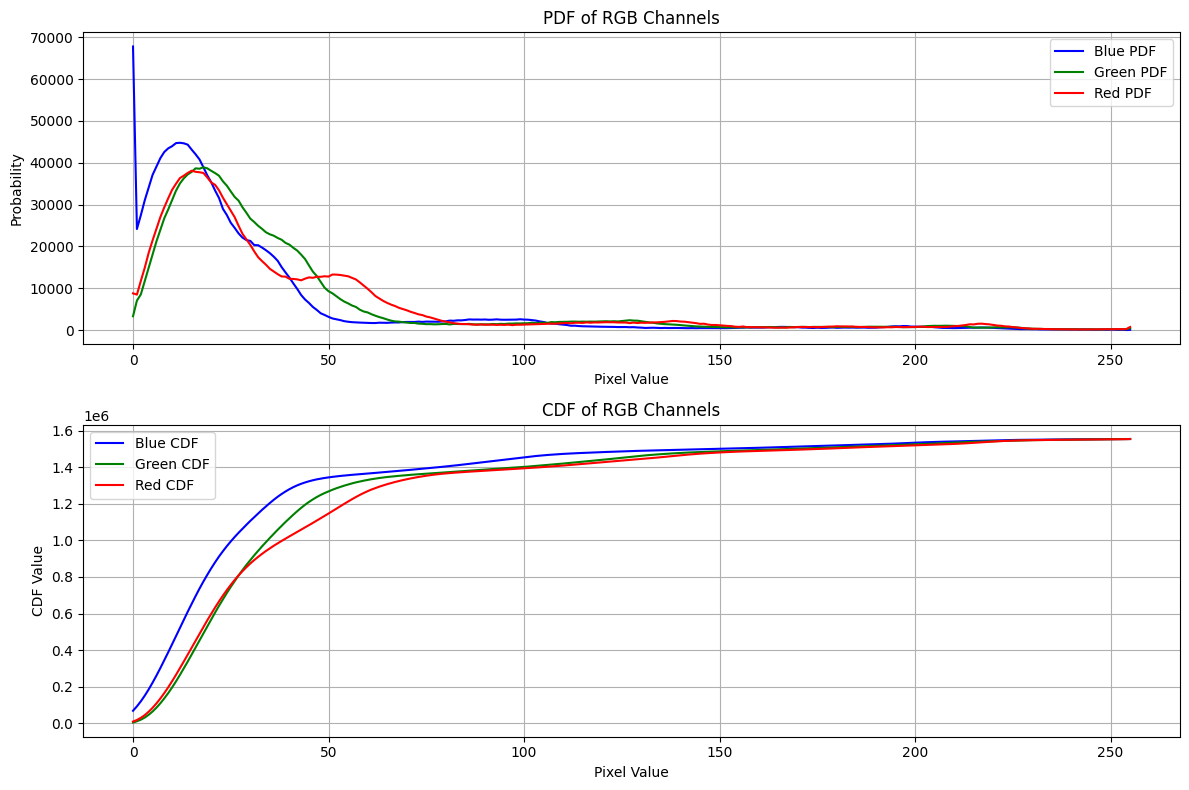

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
image_path = '/content/KakaoTalk_Photo_2023-08-15-22-07-41 009.jpeg'  # 실제 이미지 경로로 대체해주세요
image = cv2.imread(image_path)

# 이미지의 shape 확인
height, width, channels = image.shape

# RGB 채널 분리
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# 히스토그램 계산
hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])

# PDF 계산
pdf_blue = hist_blue
pdf_green = hist_green
pdf_red = hist_red

# CDF 계산
cdf_blue = pdf_blue.cumsum()
cdf_green = pdf_green.cumsum()
cdf_red = pdf_red.cumsum()

# PDF 및 CDF 그래프 그리기
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(pdf_blue, color='blue', label='Blue PDF')
plt.plot(pdf_green, color='green', label='Green PDF')
plt.plot(pdf_red, color='red', label='Red PDF')
plt.title('PDF of RGB Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Probability')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(cdf_blue, color='blue', label='Blue CDF')
plt.plot(cdf_green, color='green', label='Green CDF')
plt.plot(cdf_red, color='red', label='Red CDF')
plt.title('CDF of RGB Channels')
plt.xlabel('Pixel Value')
plt.ylabel('CDF Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


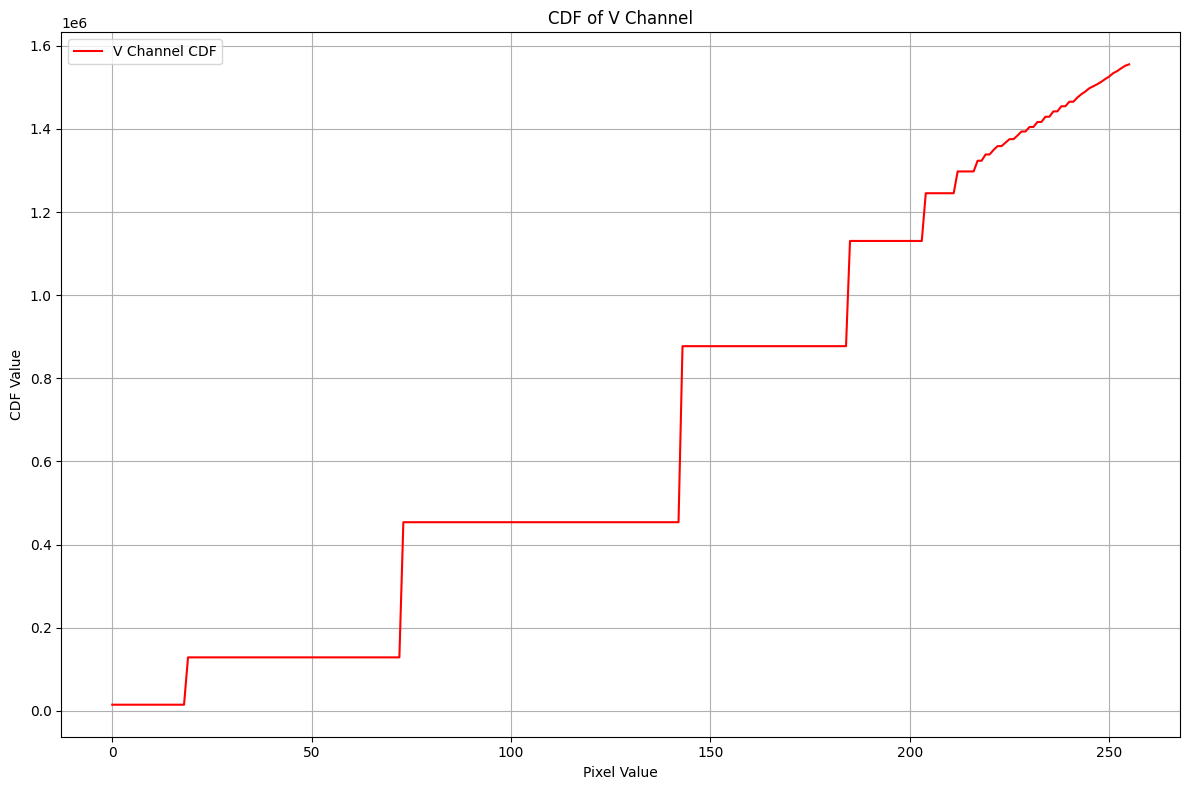

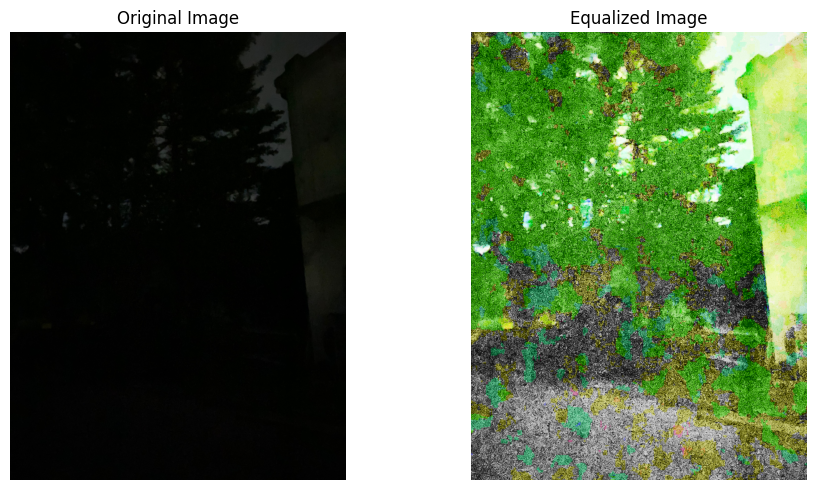

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
image_path = '/content/KakaoTalk_Photo_2023-08-15-22-07-41 010.jpeg'  # 실제 이미지 경로로 대체해주세요
image = cv2.imread(image_path)

# BGR 이미지를 HSV로 변환
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# H, S, V 채널 분리
h_channel = hsv_image[:, :, 0]
s_channel = hsv_image[:, :, 1]
v_channel = hsv_image[:, :, 2]

# H, S, V 채널에 대해 히스토그램 평활화 적용
equalized_v_channel = cv2.equalizeHist(v_channel)

# Equalized H, S, V 채널을 다시 합치기
equalized_hsv_image = cv2.merge((h_channel, s_channel, equalized_v_channel))

# 합쳐진 이미지를 BGR로 변환
equalized_bgr_image = cv2.cvtColor(equalized_hsv_image, cv2.COLOR_HSV2BGR)

# CDF 계산
cdf_v = cv2.calcHist([equalized_v_channel], [0], None, [256], [0, 256]).cumsum()

# CDF 그래프 그리기
plt.figure(figsize=(12, 8))

plt.plot(cdf_v, color='red', label='V Channel CDF')
plt.title('CDF of V Channel')
plt.xlabel('Pixel Value')
plt.ylabel('CDF Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 원본 이미지와 평활화된 이미지 비교
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_bgr_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()
